# Character analysis for the "A Song of Fire and Ice" book series.

In [1]:
import pandas as pd #  Open source library for data analysis and manipulation
import networkx as nx # Library for the creation, manipulation, and functions of complex networks (see https://networkx.org/)
import pyvis # Constructing and visualizing network graphs in the same space (see https://pandas.pydata.org/)
import matplotlib.pyplot as plt # Library for creating static, animated, and interactive visualizations (see: https://matplotlib.org/)
import scipy # Library for utilizing the computation of algorithms (see: https://scipy.org/)
from pyvis.physics import Physics
from pyvis.network import Network



## Set up to import Kaggle GOT Character Database into Jupyter Lab

In [2]:
dataset = pd.read_csv("Kaggle SOIAF Database(Character Relationships)/asoiaf-all-edges.csv") # Read the dataset (*Pass in your own path. Starting from the project folder)

# The sort below does not yield the 100 most important characters but the 100 most mentioned relationships (meaning we should have 100 edges, not characters)
dataset = dataset.sort_values(by = ['weight'], ascending = False) # Sort the dataset by weight in descending order (Giving us the most expressed relationships at the top)
dataset.head(100) # Display our data set (Leaving the braces empty yields the first 5 relationships, (100) = 100 entries, and so on... *Total relationships: 2822)

,Source,Target,Type,id,weight
1334,Eddard-Stark,Robert-Baratheon,Undirected,1334,334
2031,Jon-Snow,Samwell-Tarly,Undirected,2031,228
1965,Joffrey-Baratheon,Sansa-Stark,Undirected,1965,222
1972,Joffrey-Baratheon,Tyrion-Lannister,Undirected,1972,219
640,Bran-Stark,Hodor,Undirected,640,209
...,...,...,...,...,...
693,Brienne-of-Tarth,Catelyn-Stark,Undirected,693,53
949,Cersei-Lannister,Varys,Undirected,949,53
2597,Rickon-Stark,Robb-Stark,Undirected,2597,53
2749,Stannis-Baratheon,Tyrion-Lannister,Undirected,2749,52


## Graph Visualization with NetworkX

In [3]:
Graph = nx.from_pandas_edgelist(dataset.head(100), # limit dataset to include first 100 entries
                                source = "Source",         # Set source nodes with the source section of data in our dataset
                                target = "Target",         # Set the target nodes with the target section of the data in our dataset
                                edge_attr = "weight",      # Set the edges to represent relationships with the weight data
                                create_using = nx.Graph()) # Create the graph

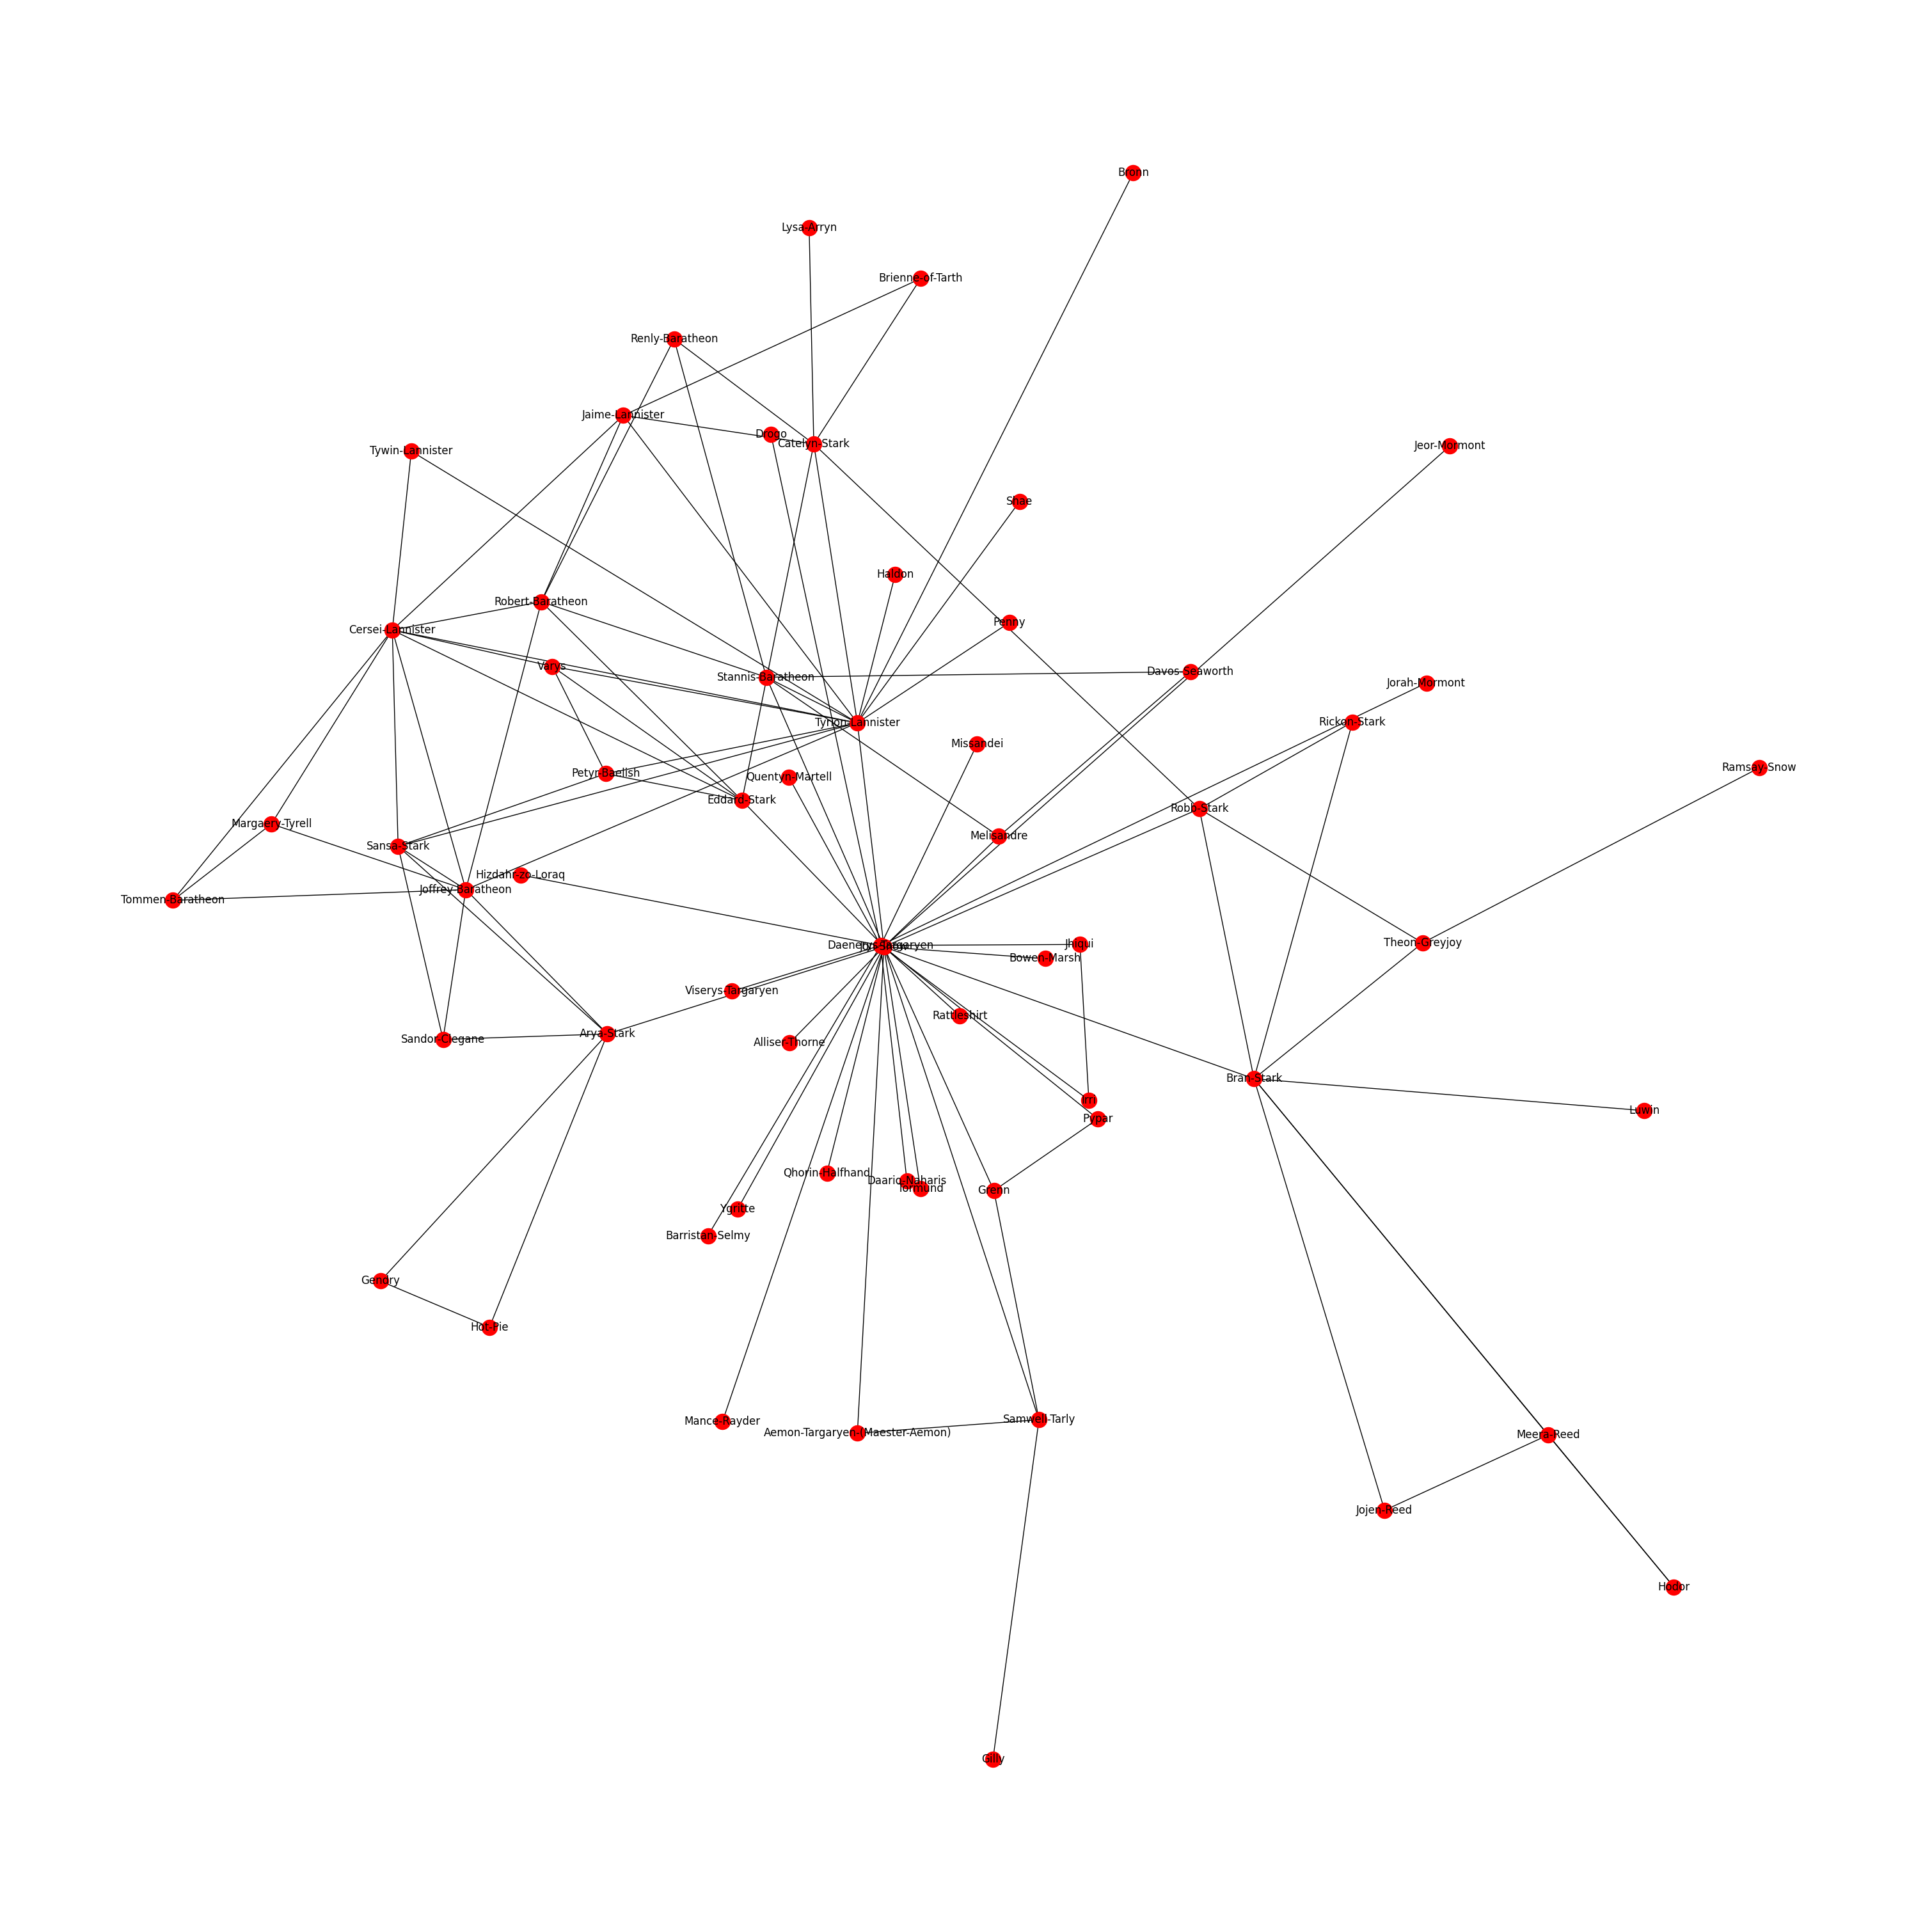

In [4]:
 plt.figure(figsize = (30,30)) # Set the sizing of the graph
 pos = nx.kamada_kawai_layout(Graph) # Set the style of the graph (See "GRAPH LAYOUT" https://networkx.org/documentation/stable/reference/drawing.html)
 nx.draw(Graph, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos) # Call to draw the graph with style attributes
 plt.show() # Output graph visualization inside our notebook

### This Graph is not accurate to the results we want to see. It is simply an example of using the NetworkX Library to draw a graph. (Notice that Jon Snow is not a node)

## Graph Visualization with Pyvis

In [5]:
net = Network(notebook = True, width = "600px", height = "400px", bgcolor = '#222222', font_color = 'white') # Create a network template with certain style attributes
net.repulsion() # Set physics typing of graph (See Pyviz Documentation)

# Set up Node degree size attribute (Scales node size to importance of connections)
node_degree = dict(Graph.degree) # Create a dictionary of characters names and their total weight (Key: name, Value: weight)
nx.set_node_attributes(Graph, node_degree, 'size') # Instantiate node attributes of the Graph object for relationships and node_degree dictionary to account for the sizing of nodes
net.from_nx(Graph) # Instantiate the network template with new information from our Graph object


node_degree = sorted(node_degree.items(), key = lambda item: item[1], reverse = True) # Sort node degree dictionary (descending)
node_degree # Returns the degree dictionary

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


[('Jon-Snow', 19),
 ('Tyrion-Lannister', 14),
 ('Cersei-Lannister', 10),
 ('Daenerys-Targaryen', 10),
 ('Joffrey-Baratheon', 8),
 ('Bran-Stark', 8),
 ('Catelyn-Stark', 7),
 ('Eddard-Stark', 6),
 ('Robert-Baratheon', 6),
 ('Sansa-Stark', 6),
 ('Arya-Stark', 6),
 ('Stannis-Baratheon', 6),
 ('Robb-Stark', 5),
 ('Jaime-Lannister', 5),
 ('Samwell-Tarly', 4),
 ('Varys', 4),
 ('Petyr-Baelish', 4),
 ('Meera-Reed', 3),
 ('Tommen-Baratheon', 3),
 ('Renly-Baratheon', 3),
 ('Theon-Greyjoy', 3),
 ('Melisandre', 3),
 ('Margaery-Tyrell', 3),
 ('Sandor-Clegane', 3),
 ('Grenn', 3),
 ('Hodor', 2),
 ('Davos-Seaworth', 2),
 ('Rickon-Stark', 2),
 ('Tywin-Lannister', 2),
 ('Jojen-Reed', 2),
 ('Brienne-of-Tarth', 2),
 ('Aemon-Targaryen-(Maester-Aemon)', 2),
 ('Gendry', 2),
 ('Pypar', 2),
 ('Hot-Pie', 2),
 ('Irri', 2),
 ('Jhiqui', 2),
 ('Jeor-Mormont', 1),
 ('Jorah-Mormont', 1),
 ('Bronn', 1),
 ('Drogo', 1),
 ('Luwin', 1),
 ('Mance-Rayder', 1),
 ('Ramsay-Snow', 1),
 ('Hizdahr-zo-Loraq', 1),
 ('Gilly', 1),
 ('

### Top 100 relationships in A Song of Fire and Ice Book Series

In [6]:
net.add_edge("Jon-Snow", "Jon-Snow", value = 0, hidden=True) # We have to add an invisible edge for scaling to work properly with Jupyter Lab, as of making this notebook
net.show_buttons() # Include User Interface for manipulation of graph physics and attributes
net.show("ASOFAI.html") # Display graph visualization

## Degree Centrality - * # of Edges / Relationships
(See: https://www.geeksforgeeks.org/degree-centrality-centrality-measure/)
---

In [7]:
degree_dict = nx.degree_centrality(Graph) # Create a dictionary based on characters' degree centrality  
degree_list = sorted(degree_dict.items(), key = lambda item: item[1]) # Sort the dictonary based on the values (ascending), and instiate a clone 
degree_list # Display

[('Jeor-Mormont', 0.016666666666666666),
 ('Jorah-Mormont', 0.016666666666666666),
 ('Bronn', 0.016666666666666666),
 ('Drogo', 0.016666666666666666),
 ('Luwin', 0.016666666666666666),
 ('Mance-Rayder', 0.016666666666666666),
 ('Ramsay-Snow', 0.016666666666666666),
 ('Hizdahr-zo-Loraq', 0.016666666666666666),
 ('Gilly', 0.016666666666666666),
 ('Barristan-Selmy', 0.016666666666666666),
 ('Ygritte', 0.016666666666666666),
 ('Qhorin-Halfhand', 0.016666666666666666),
 ('Tormund', 0.016666666666666666),
 ('Shae', 0.016666666666666666),
 ('Daario-Naharis', 0.016666666666666666),
 ('Alliser-Thorne', 0.016666666666666666),
 ('Missandei', 0.016666666666666666),
 ('Bowen-Marsh', 0.016666666666666666),
 ('Penny', 0.016666666666666666),
 ('Quentyn-Martell', 0.016666666666666666),
 ('Lysa-Arryn', 0.016666666666666666),
 ('Viserys-Targaryen', 0.016666666666666666),
 ('Haldon', 0.016666666666666666),
 ('Rattleshirt', 0.016666666666666666),
 ('Hodor', 0.03333333333333333),
 ('Davos-Seaworth', 0.03333

### Top 10 character bar graph based on degree centrality

<AxesSubplot: >

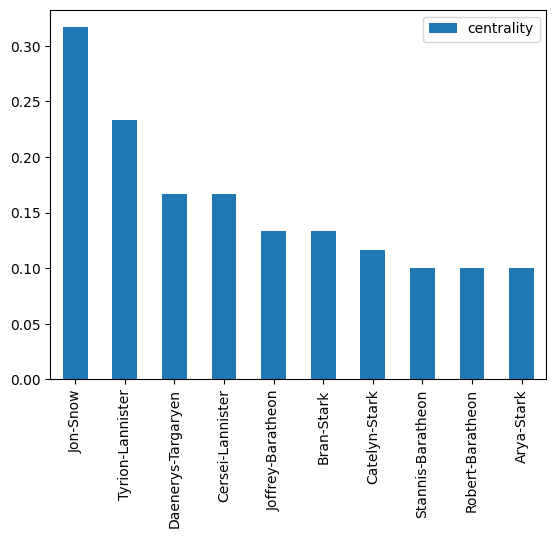

In [8]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient = 'index', columns = ['centrality']) # Create a Pandas DataFrame based on our degree centrality dicitionary
degree_df.sort_values('centrality', ascending = False)[0:10].plot(kind = "bar") # Sort and plot top 10 nodes, set to bar graph style

## Betweeness Centrality - * Represents the degree to which nodes stand between each other 
(See: https://en.wikipedia.org/wiki/Betweenness_centrality)
---

In [9]:
betweenness_dict = nx.betweenness_centrality(Graph) # Create a dictionary based on characters' betweenness centrality
betweenness_list = sorted(betweenness_dict.items(), key = lambda item: item[1], reverse = True) # Sort the dictonary based on the values (descending), and instiate a clone 
betweenness_list # Display

[('Jon-Snow', 0.4285649472937609),
 ('Tyrion-Lannister', 0.21685266710690435),
 ('Bran-Stark', 0.1305730427764326),
 ('Arya-Stark', 0.08615819209039548),
 ('Catelyn-Stark', 0.0671256756426248),
 ('Robb-Stark', 0.06339930784846039),
 ('Eddard-Stark', 0.045874422187981496),
 ('Stannis-Baratheon', 0.04337503362927092),
 ('Joffrey-Baratheon', 0.040189913664489936),
 ('Cersei-Lannister', 0.03806307628341526),
 ('Samwell-Tarly', 0.027401129943502824),
 ('Theon-Greyjoy', 0.027118644067796613),
 ('Daenerys-Targaryen', 0.024858757062146894),
 ('Sansa-Stark', 0.013671827231149264),
 ('Jaime-Lannister', 0.012560899552424974),
 ('Robert-Baratheon', 0.011275283097316995),
 ('Melisandre', 0.007645951035781544),
 ('Renly-Baratheon', 0.002440812483185365),
 ('Petyr-Baelish', 0.0015039009954264195),
 ('Varys', 0.0008945386064030133),
 ('Grenn', 0.0005649717514124294),
 ('Meera-Reed', 0.0002824858757062147),
 ('Hodor', 0.0),
 ('Jeor-Mormont', 0.0),
 ('Jorah-Mormont', 0.0),
 ('Bronn', 0.0),
 ('Davos-Seaw

### Top 10 character bar graph based on betweenness centrality

<AxesSubplot: >

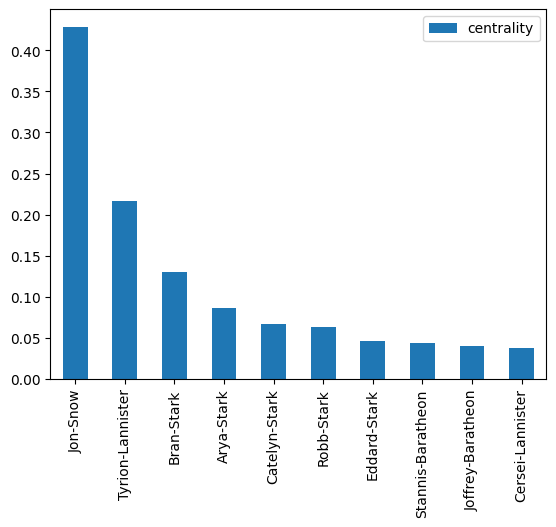

In [10]:
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient = 'index', columns = ['centrality']) # Create a Pandas DataFrame based on our betweenness centrality dcitionary
betweenness_df.sort_values('centrality', ascending = False)[0:10].plot(kind = "bar") # Sort and plot top 10 nodes, set to line graph style

## Closeness Centrality - * Indicates how close a node is to all the other nodes within the network.
(See: https://www.sciencedirect.com/topics/computer-science/closeness-centrality)
---

In [11]:
closeness_dict = nx.closeness_centrality(Graph) # Create a dictionary based on characters' closeness centrality
closeness_list = sorted(closeness_dict.items(), key = lambda item: item[1], reverse = True) # Sort the dictonary based on the values (descending), and instiate a clone 
closeness_list # Display

[('Jon-Snow', 0.4763888888888889),
 ('Tyrion-Lannister', 0.4212280701754386),
 ('Stannis-Baratheon', 0.3705246913580247),
 ('Eddard-Stark', 0.36712538226299696),
 ('Robb-Stark', 0.3541297935103245),
 ('Bran-Stark', 0.3510233918128655),
 ('Arya-Stark', 0.3479710144927536),
 ('Catelyn-Stark', 0.3334722222222222),
 ('Cersei-Lannister', 0.32271505376344084),
 ('Joffrey-Baratheon', 0.3201333333333333),
 ('Melisandre', 0.31509186351706037),
 ('Samwell-Tarly', 0.3126302083333333),
 ('Sansa-Stark', 0.3126302083333333),
 ('Jaime-Lannister', 0.3126302083333333),
 ('Grenn', 0.31020671834625324),
 ('Robert-Baratheon', 0.3078205128205128),
 ('Aemon-Targaryen-(Maester-Aemon)', 0.3078205128205128),
 ('Pypar', 0.305470737913486),
 ('Jeor-Mormont', 0.3031565656565657),
 ('Mance-Rayder', 0.3031565656565657),
 ('Ygritte', 0.3031565656565657),
 ('Qhorin-Halfhand', 0.3031565656565657),
 ('Tormund', 0.3031565656565657),
 ('Alliser-Thorne', 0.3031565656565657),
 ('Bowen-Marsh', 0.3031565656565657),
 ('Rattle

### Top 10 character bar graph based on closeness centrality

<AxesSubplot: >

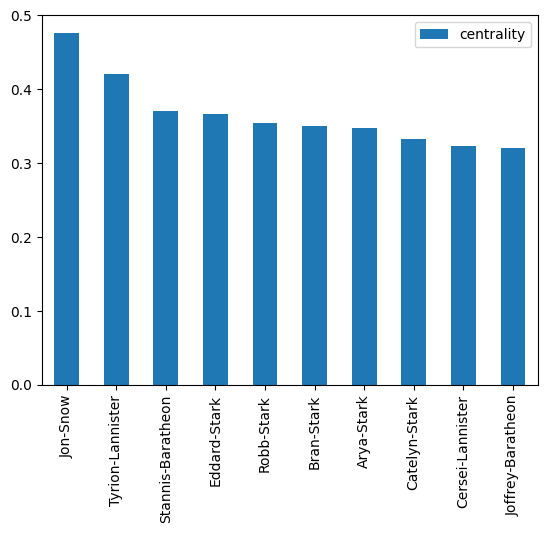

In [12]:
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality']) # Create a Pandas DataFrame based on our degree centrality dcitionary
closeness_df.sort_values('centrality', ascending=False)[0:10].plot(kind="bar") # Sort and plot top 10 nodes, set to bar graph style

## Community Detection Implementation

Community detection will help us visualize the unique groups of characters that make up our graph. In this example I will be using the louvain algorithm for community detection.

(See: https://neo4j.com/docs/graph-data-science/current/algorithms/louvain/)

In [34]:
import community as community_louvain # proper import is pip install python_louvain
communities = community_louvain.best_partition(Graph) # create a dictionary of nodes and their respective communities

### Results of Louvain Community Detection Algorithm

In [35]:
communities # display the dictionary

{'Eddard-Stark': 4,
 'Robert-Baratheon': 0,
 'Jon-Snow': 1,
 'Samwell-Tarly': 1,
 'Joffrey-Baratheon': 4,
 'Sansa-Stark': 4,
 'Tyrion-Lannister': 4,
 'Bran-Stark': 3,
 'Hodor': 3,
 'Cersei-Lannister': 4,
 'Jeor-Mormont': 1,
 'Robb-Stark': 3,
 'Daenerys-Targaryen': 2,
 'Jorah-Mormont': 2,
 'Arya-Stark': 4,
 'Bronn': 4,
 'Davos-Seaworth': 0,
 'Stannis-Baratheon': 0,
 'Jaime-Lannister': 0,
 'Rickon-Stark': 3,
 'Catelyn-Stark': 0,
 'Drogo': 2,
 'Meera-Reed': 3,
 'Tywin-Lannister': 4,
 'Luwin': 3,
 'Jojen-Reed': 3,
 'Mance-Rayder': 1,
 'Brienne-of-Tarth': 0,
 'Tommen-Baratheon': 4,
 'Renly-Baratheon': 0,
 'Aemon-Targaryen-(Maester-Aemon)': 1,
 'Varys': 4,
 'Ramsay-Snow': 3,
 'Theon-Greyjoy': 3,
 'Hizdahr-zo-Loraq': 2,
 'Melisandre': 0,
 'Petyr-Baelish': 4,
 'Gilly': 1,
 'Barristan-Selmy': 2,
 'Gendry': 4,
 'Ygritte': 1,
 'Margaery-Tyrell': 4,
 'Pypar': 1,
 'Hot-Pie': 4,
 'Qhorin-Halfhand': 1,
 'Irri': 2,
 'Tormund': 1,
 'Sandor-Clegane': 4,
 'Shae': 4,
 'Daario-Naharis': 2,
 'Jhiqui': 2,
 '

In [36]:
nx.set_node_attributes(Graph, communities, 'group')

com_net = Network(notebook = True, width = "800px", height = "600px", bgcolor = '#222222', font_color = 'white')
com_net.from_nx(Graph)
com_net.show("Character_Communities.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 
